<a href="https://colab.research.google.com/github/JOJO-HU22/ECG-Classification-by-SVM-Model/blob/main/ECG_Signal__Processingandfeatureextraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>ECG Signal Processing for Health Monitoring</h1>

<h2>Installing Dependencies</h2>

In [2]:
!pip install pywavelets wfdb numpy matplotlib scipy scikit-learn tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 82.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.


In [4]:
import pywt
import wfdb
print("All libraries installed successfully!")

All libraries installed successfully!


<h2>Load and Visualize ECG Data from MIT-BIH Arrhythmia Database </h2>

In [5]:
!wget -r -N -c -np https://physionet.org/files/mitdb/1.0.0/ -P /content/mitdb/

Streaming output truncated to the last 5000 lines.
Length: 5468 (5.3K) [application/octet-stream]
Saving to: ‘/content/mitdb/physionet.org/files/mitdb/1.0.0/223.atr’

physionet.org/files 100%[===================>]   5.34K  --.-KB/s    in 0s      

2025-12-17 07:58:46 (1.41 GB/s) - ‘/content/mitdb/physionet.org/files/mitdb/1.0.0/223.atr’ saved [5468/5468]

--2025-12-17 07:58:46--  https://physionet.org/files/mitdb/1.0.0/223.dat
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 1950000 (1.9M) [application/octet-stream]
Saving to: ‘/content/mitdb/physionet.org/files/mitdb/1.0.0/223.dat’

physionet.org/files 100%[===================>]   1.86M   328KB/s    in 6.0s    

2025-12-17 07:58:52 (315 KB/s) - ‘/content/mitdb/physionet.org/files/mitdb/1.0.0/223.dat’ saved [1950000/1950000]

--2025-12-17 07:58:52--  https://physionet.org/files/mitdb/1.0.0/223.hea
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting respon

In [6]:
!ls /content/mitdb/

physionet.org


In [7]:
!wget -r -N -c -np -P /content/mitdb/ https://physionet.org/files/mitdb/1.0.0/

--2025-12-17 08:06:00--  https://physionet.org/files/mitdb/1.0.0/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/mitdb/physionet.org/files/mitdb/1.0.0/index.html’

physionet.org/files     [ <=>                ]  22.87K  --.-KB/s    in 0.02s   

Last-modified header missing -- time-stamps turned off.
2025-12-17 08:06:01 (1.18 MB/s) - ‘/content/mitdb/physionet.org/files/mitdb/1.0.0/index.html’ saved [23416]

Loading robots.txt; please ignore errors.
--2025-12-17 08:06:01--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.

--2025-12-17 08:06:01--  https://physionet.org/files/mitdb/1.0.0/mitdbdir/
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting

In [8]:
!ls /content/mitdb/

physionet.org


In [9]:
!wget -r -N -c -np -P /content/mitdb/ https://physionet.org/files/mitdb/1.0.0/

--2025-12-17 08:07:11--  https://physionet.org/files/mitdb/1.0.0/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/mitdb/physionet.org/files/mitdb/1.0.0/index.html’

physionet.org/files     [ <=>                ]  22.87K  --.-KB/s    in 0.02s   

Last-modified header missing -- time-stamps turned off.
2025-12-17 08:07:12 (1.32 MB/s) - ‘/content/mitdb/physionet.org/files/mitdb/1.0.0/index.html’ saved [23416]

Loading robots.txt; please ignore errors.
--2025-12-17 08:07:12--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.

--2025-12-17 08:07:12--  https://physionet.org/files/mitdb/1.0.0/mitdbdir/
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting

In [10]:
!mv /content/mitdb/physionet.org/files/mitdb/1.0.0/* /content/mitdb/

In [11]:
!ls /content/mitdb/

100.atr    106.hea  114.atr  121.dat  203.at-  212.atr	220.dat  231.xws
100.dat    106.xws  114.dat  121.hea  203.at_  212.dat	220.hea  232.atr
100.hea    107.atr  114.hea  121.xws  203.atr  212.hea	220.xws  232.dat
100.xws    107.dat  114.xws  122.atr  203.dat  212.xws	221.atr  232.hea
101.atr    107.hea  115.atr  122.dat  203.hea  213.atr	221.dat  232.xws
101.dat    107.xws  115.dat  122.hea  203.xws  213.dat	221.hea  233.atr
101.hea    108.at_  115.hea  122.xws  205.atr  213.hea	221.xws  233.dat
101.xws    108.atr  115.xws  123.atr  205.dat  213.xws	222.at_  233.hea
102-0.atr  108.dat  116.atr  123.dat  205.hea  214.at_	222.atr  233.xws
102.atr    108.hea  116.dat  123.hea  205.xws  214.atr	222.dat  234.atr
102.dat    108.xws  116.hea  123.xws  207.atr  214.dat	222.hea  234.dat
102.hea    109.atr  116.xws  124.atr  207.dat  214.hea	222.xws  234.hea
102.xws    109.dat  117.at_  124.dat  207.hea  214.xws	223.atr  234.xws
103.atr    109.hea  117.atr  124.hea  207.xws  215.at_	223.dat  

<h2>Load and Visualize ECG Data</h2>

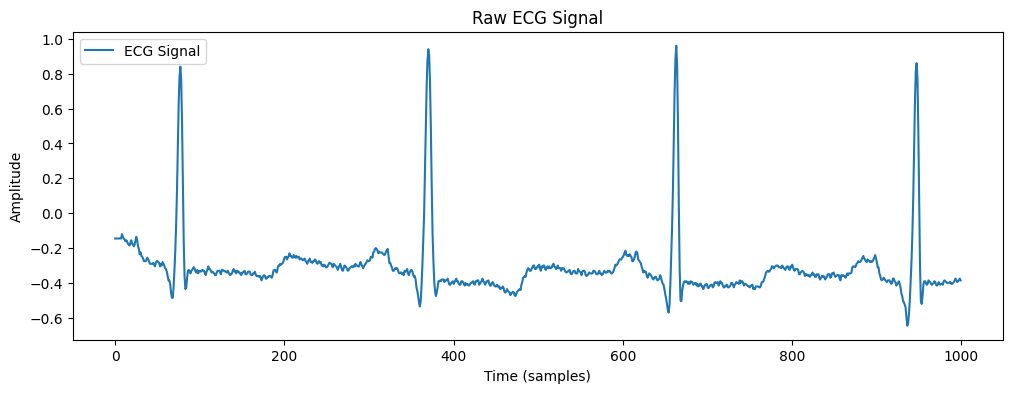

In [12]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# Load ECG Record (100th patient data)
record = wfdb.rdrecord('/content/mitdb/100', sampto=1000)
annotation = wfdb.rdann('/content/mitdb/100', 'atr')

# Extract ECG signal
ecg_signal = record.p_signal[:, 0]

# Plot the ECG Signal
plt.figure(figsize=(12, 4))
plt.plot(ecg_signal, label="ECG Signal")
plt.title("Raw ECG Signal")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

Load all signals (48)

In [13]:
import wfdb
import numpy as np

# Load 48 complete signals (100-124, 200-234)
signal_nums = list(range(100, 125)) + list(range(200, 235))
db_path = '/content/mitdb'

all_ecg_signals = []
all_annotations = []

for num in signal_nums:
    try:
        # Load ECG Record
        record = wfdb.rdrecord(f'{db_path}/{num}')
        # Load the corresponding annotation
        annotation = wfdb.rdann(f'{db_path}/{num}', 'atr')
        # xtract ECG signal
        ecg_signal = record.p_signal[:, 0]

        all_ecg_signals.append(ecg_signal)
        all_annotations.append(annotation)
        # Printing progress
        print(f"Loaded signal{num}: length={len(ecg_signal)}")
    except Exception as e:
        print(f"signal{num} loading failed: {e}")

print(f"\nTotal number of load signals: {len(all_ecg_signals)}")

Loaded signal100: length=650000
Loaded signal101: length=650000
Loaded signal102: length=650000
Loaded signal103: length=650000
Loaded signal104: length=650000
Loaded signal105: length=650000
Loaded signal106: length=650000
Loaded signal107: length=650000
Loaded signal108: length=650000
Loaded signal109: length=650000
signal110 loading failed: [Errno 2] No such file or directory: '/content/mitdb/110.hea'
Loaded signal111: length=650000
Loaded signal112: length=650000
Loaded signal113: length=650000
Loaded signal114: length=650000
Loaded signal115: length=650000
Loaded signal116: length=650000
Loaded signal117: length=650000
Loaded signal118: length=650000
Loaded signal119: length=650000
signal120 loading failed: [Errno 2] No such file or directory: '/content/mitdb/120.hea'
Loaded signal121: length=650000
Loaded signal122: length=650000
Loaded signal123: length=650000
Loaded signal124: length=650000
Loaded signal200: length=650000
Loaded signal201: length=650000
Loaded signal202: length

<h2>Preprocess the Signal (Filter Noise)</h2>
<p>Applying DWT to remove unwanted noise.</p>

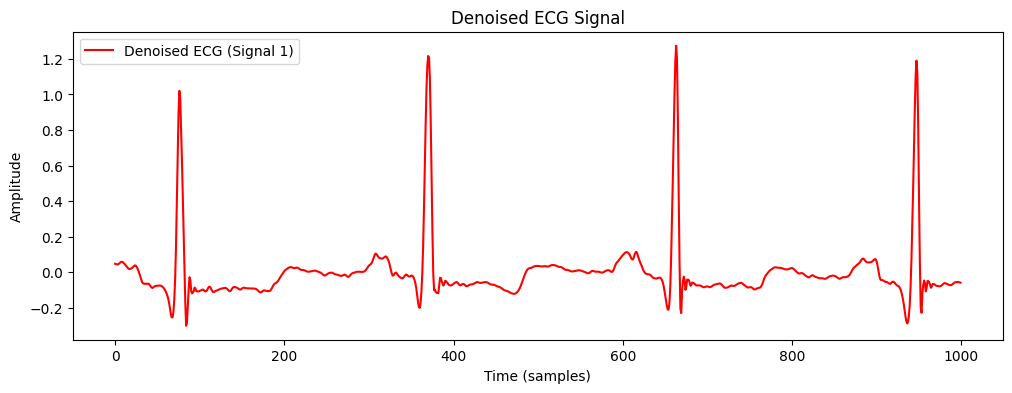

finished 1/48 denoised
finished 2/48 denoised
finished 3/48 denoised
finished 4/48 denoised
finished 5/48 denoised
finished 6/48 denoised
finished 7/48 denoised
finished 8/48 denoised
finished 9/48 denoised
finished 10/48 denoised
finished 11/48 denoised
finished 12/48 denoised
finished 13/48 denoised
finished 14/48 denoised
finished 15/48 denoised
finished 16/48 denoised
finished 17/48 denoised
finished 18/48 denoised
finished 19/48 denoised
finished 20/48 denoised
finished 21/48 denoised
finished 22/48 denoised
finished 23/48 denoised
finished 24/48 denoised
finished 25/48 denoised
finished 26/48 denoised
finished 27/48 denoised
finished 28/48 denoised
finished 29/48 denoised
finished 30/48 denoised
finished 31/48 denoised
finished 32/48 denoised
finished 33/48 denoised
finished 34/48 denoised
finished 35/48 denoised
finished 36/48 denoised
finished 37/48 denoised
finished 38/48 denoised
finished 39/48 denoised
finished 40/48 denoised
finished 41/48 denoised
finished 42/48 denoised
f

In [14]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

# denoiced function
def ecg_denoise_db6_9level(ecg_signal, wavelet='db6', level=9):
    # decomposed up to 9 levels using db6 wavelet
    coeffs = pywt.wavedec(ecg_signal, wavelet, level=level)

    # sub-band (set noise sub-bands to zero)
    coeffs[0] = np.zeros_like(coeffs[0])  # 0–0.351 Hz
    coeffs[-1] = np.zeros_like(coeffs[-1]) # 90–180 Hz
    coeffs[-2] = np.zeros_like(coeffs[-2])  # 45–90 Hz

    # inverse DWT reconstruction of denoised signal
    denoised_ecg = pywt.waverec(coeffs, wavelet)

    # align the original signal length
    return denoised_ecg[:len(ecg_signal)]

fs = 360  # ECG signal samples

all_denoised_ecg = []
plot_flag = True

# apply denoiced for each signal
for idx, ecg_signal in enumerate(all_ecg_signals):

    denoised = ecg_denoise_db6_9level(ecg_signal)
    all_denoised_ecg.append(denoised)

    # Plot the result for checking
    if plot_flag:
        plot_segment = denoised[:1000]
        plt.figure(figsize=(12, 4))
        plt.plot(plot_segment, label="Denoised ECG (Signal 1)", color='red')
        plt.title("Denoised ECG Signal")
        plt.xlabel("Time (samples)")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.show()
        plot_flag = False

    # print the results
    print(f"finished {idx+1}/48 denoised")

print(f"\nfinished {len(all_denoised_ecg)}signals")
print(f"signal length: {len(all_denoised_ecg[0])}")

Detect QRS complex wave by Pan-Tompkins

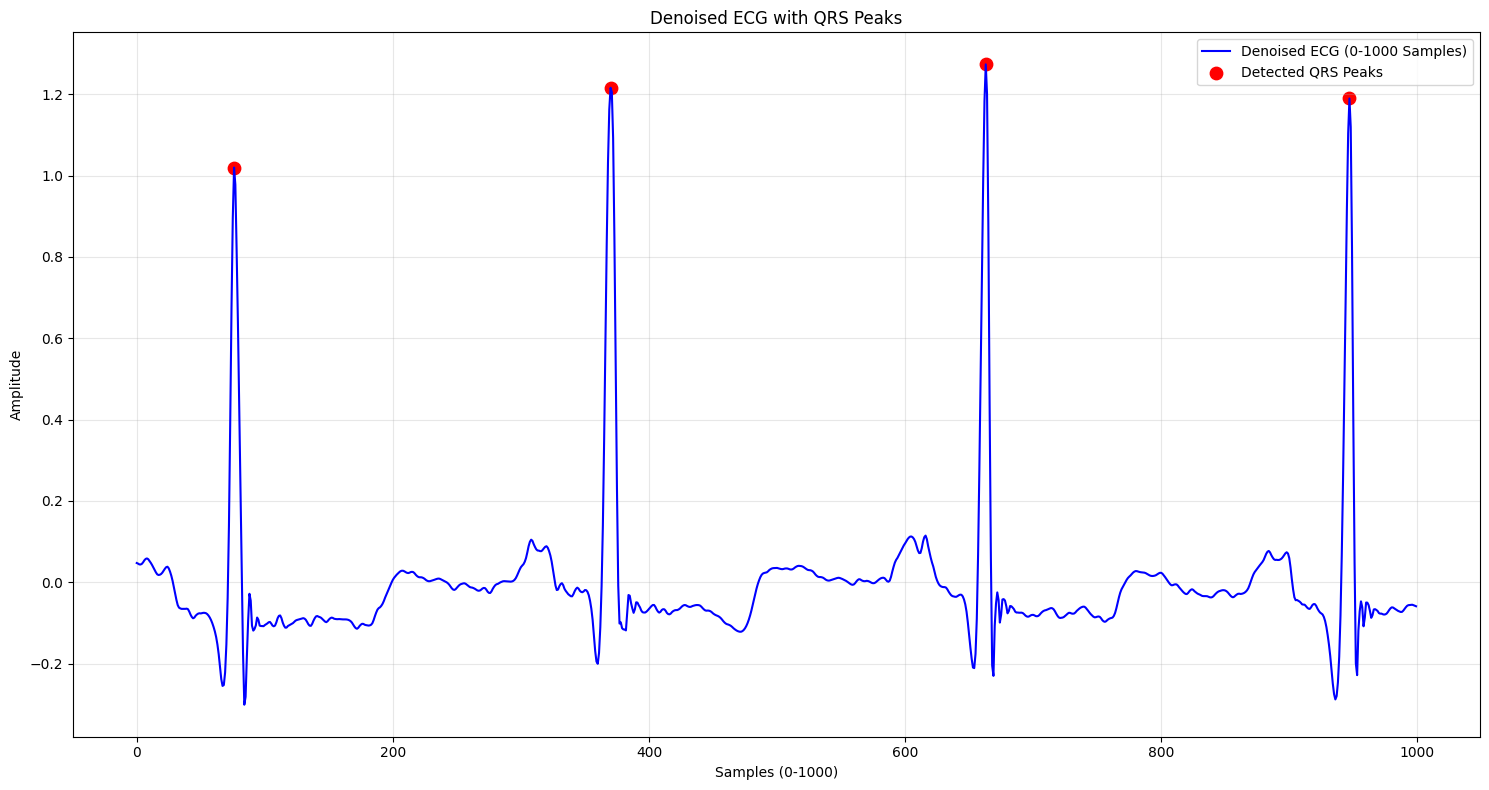

finished 1/48 QRS detection，detected the amount of QRS complex：2274
finished 2/48 QRS detection，detected the amount of QRS complex：1878
finished 3/48 QRS detection，detected the amount of QRS complex：2091
finished 4/48 QRS detection，detected the amount of QRS complex：2081
finished 5/48 QRS detection，detected the amount of QRS complex：2375
finished 6/48 QRS detection，detected the amount of QRS complex：2739
finished 7/48 QRS detection，detected the amount of QRS complex：1486
finished 8/48 QRS detection，detected the amount of QRS complex：2119
finished 9/48 QRS detection，detected the amount of QRS complex：2621
finished 10/48 QRS detection，detected the amount of QRS complex：2534
finished 11/48 QRS detection，detected the amount of QRS complex：2128
finished 12/48 QRS detection，detected the amount of QRS complex：2550
finished 13/48 QRS detection，detected the amount of QRS complex：1795
finished 14/48 QRS detection，detected the amount of QRS complex：1909
finished 15/48 QRS detection，detected the a

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# QRS detection
def pan_tompkins_qrs_detect(denoised_ecg, fs=360):
    # taking derivatives
    derivative = np.diff(denoised_ecg)
    derivative = np.append(derivative, 0)

    # absolute/rectification operation
    absolute_rect = np.abs(derivative)

    # squaring
    squared_signal = absolute_rect ** 2

    # moving average integration
    window_size = int(fs * 0.15)
    moving_avg = np.convolve(squared_signal, np.ones(window_size)/window_size, mode='same')

    # threshold
    init_samples = min(int(fs * 1), len(moving_avg) // 2)
    threshold = 2 * np.mean(moving_avg[:init_samples])

    qrs_locs = []
    refractory_period = int(fs * 0.2)
    last_qrs_pos = -refractory_period

    for i in range(len(moving_avg)):
        if (moving_avg[i] > threshold) and (i - last_qrs_pos > refractory_period):
            # Find the peak value in the original denoised ECG
            search_start = max(0, i - int(0.1 * fs))
            search_end = min(len(denoised_ecg), i + int(0.1 * fs))
            qrs_peak_pos = search_start + np.argmax(denoised_ecg[search_start:search_end])

            qrs_locs.append(qrs_peak_pos)
            last_qrs_pos = qrs_peak_pos

    return qrs_locs

fs = 360
all_qrs_positions = []
plot_flag = True

for idx, denoised_ecg in enumerate(all_denoised_ecg):
    # apply QRS complex detection for each signal
    qrs_pos = pan_tompkins_qrs_detect(denoised_ecg, fs=fs)
    all_qrs_positions.append(qrs_pos)

    # plot the first signal
    if plot_flag:
        plot_ecg = denoised_ecg[:1000]
        # QRS position
        plot_qrs = [pos for pos in qrs_pos if pos < 1000]

        plt.figure(figsize=(15, 8))
        plt.plot(plot_ecg, color='blue', label='Denoised ECG (0-1000 Samples)')
        plt.scatter(plot_qrs, plot_ecg[plot_qrs], color='red', s=80, label='Detected QRS Peaks')
        plt.title('Denoised ECG with QRS Peaks')
        plt.xlabel('Samples (0-1000)')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

        plot_flag = False

    # print the results
    print(f"finished {idx+1}/48 QRS detection，detected the amount of QRS complex：{len(qrs_pos)}")

total_qrs = sum(len(qrs) for qrs in all_qrs_positions)
print(f"\nfinished {len(all_qrs_positions)} signals")
print(f"total amount of QRS complex: {total_qrs}")

ECG Signal window length = 200 \
Apply DWT to each beat

/usr/local/lib/python3.12/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


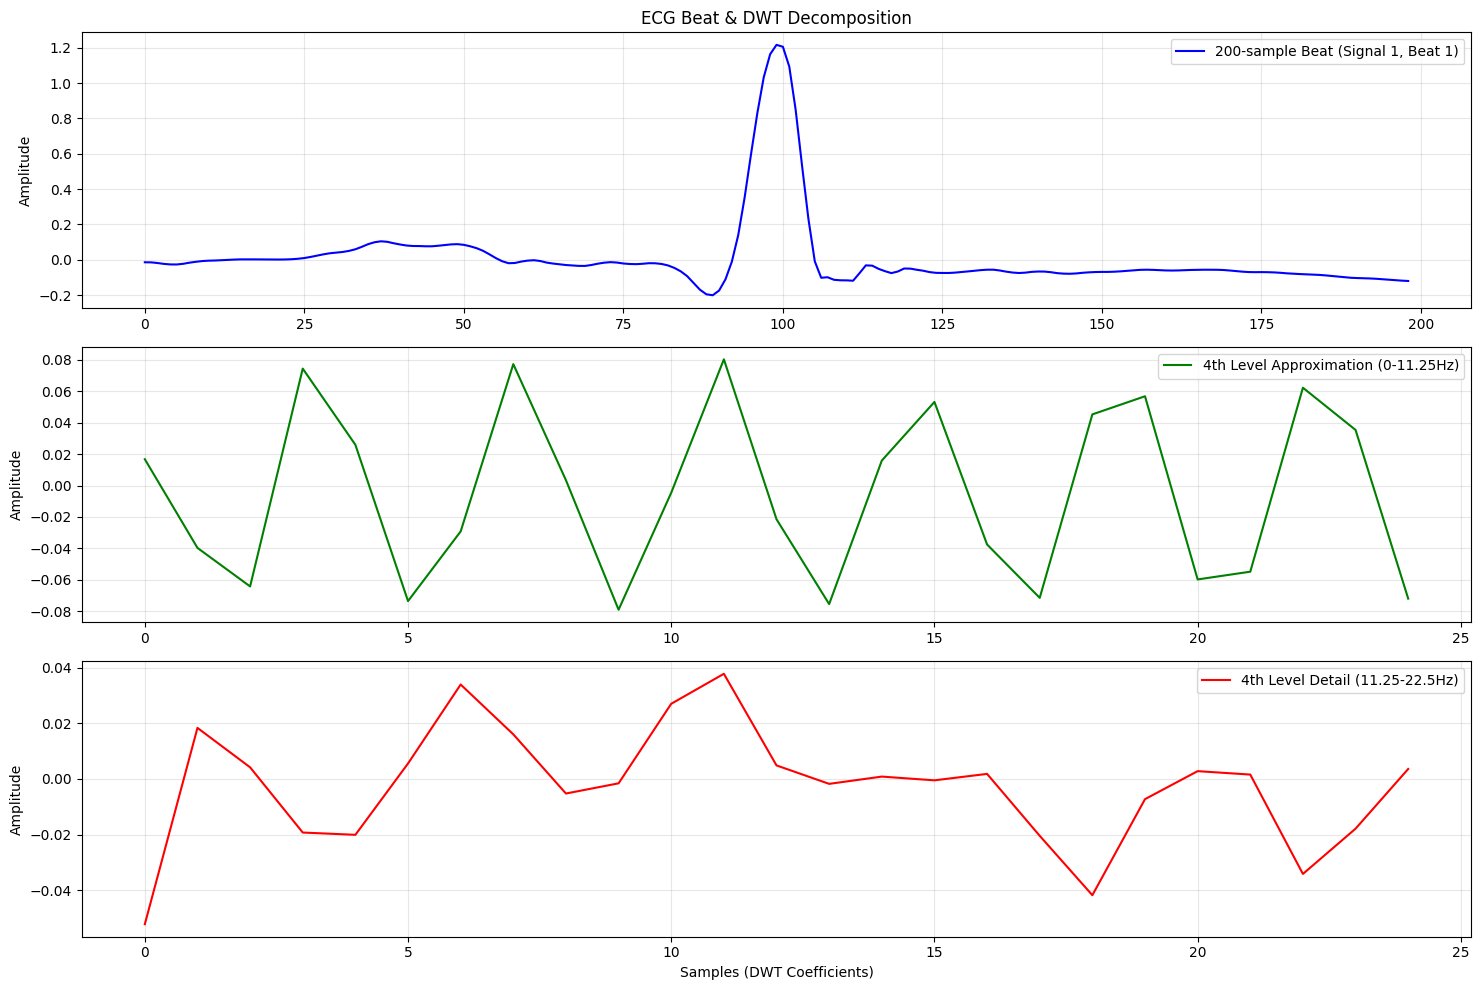

finished 1/48：Effective 200-sample ECG beat=2272，fourth level approximation sub band=25
finished 2/48：Effective 200-sample ECG beat=1877，fourth level approximation sub band=25
finished 3/48：Effective 200-sample ECG beat=2091，fourth level approximation sub band=25
finished 4/48：Effective 200-sample ECG beat=2081，fourth level approximation sub band=25
finished 5/48：Effective 200-sample ECG beat=2374，fourth level approximation sub band=25
finished 6/48：Effective 200-sample ECG beat=2738，fourth level approximation sub band=25
finished 7/48：Effective 200-sample ECG beat=1485，fourth level approximation sub band=25
finished 8/48：Effective 200-sample ECG beat=2119，fourth level approximation sub band=25
finished 9/48：Effective 200-sample ECG beat=2620，fourth level approximation sub band=25
finished 10/48：Effective 200-sample ECG beat=2533，fourth level approximation sub band=25
finished 11/48：Effective 200-sample ECG beat=2128，fourth level approximation sub band=25
finished 12/48：Effective 200-s

In [16]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# detect heart beats
def extract_200sample_beats(denoised_ecg, qrs_positions):
    beats = []
    for pos in qrs_positions:
        start = pos - 99  # 99 samples before the QRS peak
        end = pos + 100   # 100 samples after the peak
        # neglected the beats if there were insufficient samples after the last detected QRS complex
        if start >= 0 and end <= len(denoised_ecg):
            beat = denoised_ecg[start:end]
            beats.append(beat)
    return np.array(beats)

# dmey
def dmey_wavelet_decompose(beat, wavelet='dmey', level=4):
    # 4th level approximation and detail
    coeffs = pywt.wavedec(beat, wavelet, level=level)
    cA4 = coeffs[0]  # fourth level approximation sub band (0–11.25 Hz)
    cD4 = coeffs[1]  # fourth level detail consist of frequency (11.25–22.5 Hz)
    cA4 = np.pad(cA4, (0, 25 - len(cA4)))[:25] if len(cA4) < 25 else cA4[:25]
    cD4 = np.pad(cD4, (0, 25 - len(cD4)))[:25] if len(cD4) < 25 else cD4[:25]
    return cA4, cD4

# Stores 200 sample points of all signals: beat, cA4, cD4
all_beats = []
all_cA4 = []
all_cD4 = []
plot_flag = True

for idx, (denoised_ecg, qrs_pos) in enumerate(zip(all_denoised_ecg, all_qrs_positions)):
    # extract 200 sample beats
    beats = extract_200sample_beats(denoised_ecg, qrs_pos)
    # apply dmey for each sample beat
    cA4_list = []
    cD4_list = []
    for beat in beats:
        cA4, cD4 = dmey_wavelet_decompose(beat)
        cA4_list.append(cA4)
        cD4_list.append(cD4)
    # save the results
    all_beats.extend(beats)
    all_cA4.extend(cA4_list)
    all_cD4.extend(cD4_list)

    # plot the result
    if plot_flag and len(beats) > 0:
        plt.figure(figsize=(15, 10))
        # plot1: 200 sample beat
        plt.subplot(3, 1, 1)
        plt.plot(beats[0], color='blue', label=f'200-sample Beat (Signal 1, Beat 1)')
        plt.title('ECG Beat & DWT Decomposition')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(alpha=0.3)
        # plot2: fourth level approximation sub band (0-11.25Hz)
        plt.subplot(3, 1, 2)
        plt.plot(cA4_list[0], color='green', label='4th Level Approximation (0-11.25Hz)')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(alpha=0.3)
        # plot3: fourth level detail consist of frequency (11.25-22.5Hz）
        plt.subplot(3, 1, 3)
        plt.plot(cD4_list[0], color='red', label='4th Level Detail (11.25-22.5Hz)')
        plt.xlabel('Samples (DWT Coefficients)')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

        plot_flag = False

    print(f"finished {idx+1}/48：Effective 200-sample ECG beat={len(beats)}，fourth level approximation sub band={len(cA4_list[0]) if len(cA4_list)>0 else 0}")

# results
all_beats = np.array(all_beats)
all_cA4 = np.array(all_cA4)
all_cD4 = np.array(all_cD4)

print(f"Total amount of 200-sample ECG beat：{len(all_beats)}")

<h2>Feature Extraction</h2>

Dimensionality reduction algorithms: PCA

In [17]:
import numpy as np
from sklearn.decomposition import PCA

# principal Component Analysis function (PCA)
def pca_feature_extraction(subband_data, n_components=6, var_threshold=0.99):

    # compute the covariance matrix from the data
    mean_vec = np.mean(subband_data, axis=0)
    centered_data = subband_data - mean_vec

    # dimensionality reduction
    pca = PCA(n_components=n_components, svd_solver='full', random_state=42)
    pca_features = pca.fit_transform(centered_data)

    # total variability verification
    total_var_ratio = np.sum(pca.explained_variance_ratio_)
    if total_var_ratio < var_threshold:
        print(f"the total variability didn't achieve 99%")
    else:
        print(f"six principal components was selected based on containment of {total_var_ratio:.2%}")

    return pca_features, pca.explained_variance_ratio_

# applied PCA on both sub band coefficients of 4th level approximation and detail independently
# 0-11.25Hz PCA
cA4_pca, cA4_var_ratio = pca_feature_extraction(all_cA4)
print(f"\n total variability of the fourth level approximation sub band: ")
for i, ratio in enumerate(cA4_var_ratio, 1):
    print(f"  PC{i}: {ratio:.2%}")

# 11.25-22.5Hz PCA
cD4_pca, cD4_var_ratio = pca_feature_extraction(all_cD4)
print(f"\n total variability of the fourth level detail: ")
for i, ratio in enumerate(cD4_var_ratio, 1):
    print(f"  PC{i}: {ratio:.2%}")

# six features each from the two sub bands
pca_total_features = np.hstack([cA4_pca, cD4_pca])

# print the results
print(f"\nPCA dimentionality reduction finished")
print(f"total ECG beats: {len(pca_total_features)}")
print(f"PCA features shape: {pca_total_features.shape}")

# save the PCA features
# np.save("pca_total_features.npy", pca_total_features)
# print("PCA features saved in pca_total_features.npy")

six principal components was selected based on containment of 100.00%

 total variability of the fourth level approximation sub band: 
  PC1: 85.02%
  PC2: 14.33%
  PC3: 0.62%
  PC4: 0.02%
  PC5: 0.00%
  PC6: 0.00%
six principal components was selected based on containment of 99.99%

 total variability of the fourth level detail: 
  PC1: 66.01%
  PC2: 28.44%
  PC3: 4.92%
  PC4: 0.51%
  PC5: 0.08%
  PC6: 0.02%

PCA dimentionality reduction finished
total ECG beats: 105711
PCA features shape: (105711, 12)


<h3>Computing Fourier Transform (FFT)</h3>

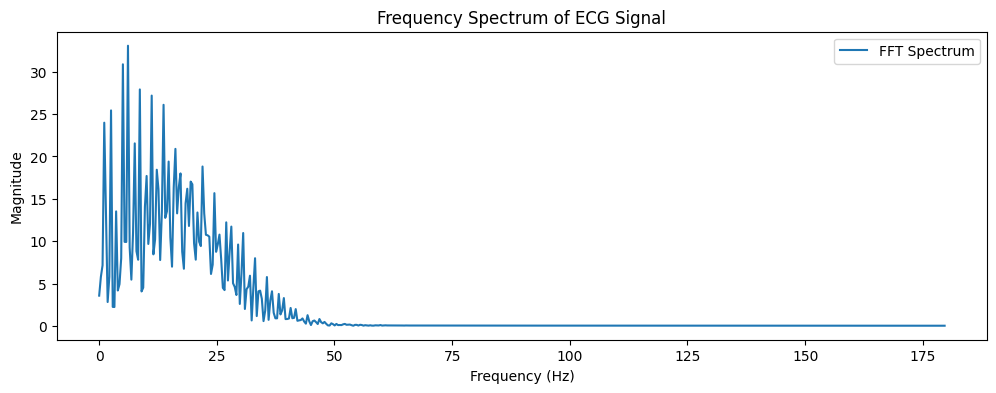

In [ ]:
fft_vals = np.abs(np.fft.fft(filtered_ecg))
fft_freqs = np.fft.fftfreq(len(filtered_ecg), 1/fs)

plt.figure(figsize=(12, 4))
plt.plot(fft_freqs[:len(fft_freqs)//2], fft_vals[:len(fft_vals)//2], label="FFT Spectrum")
plt.title("Frequency Spectrum of ECG Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

<h3>Appling Wavelet Transform</h3>

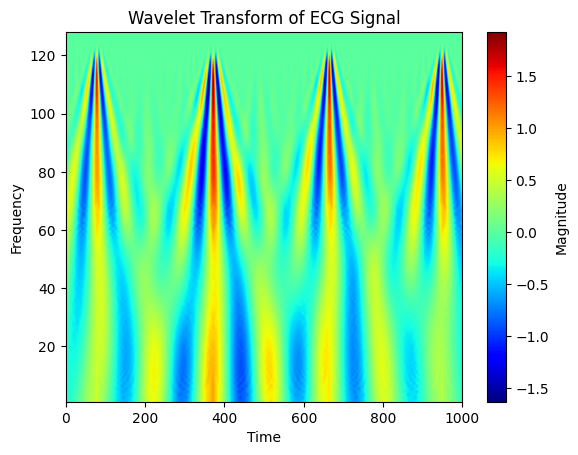

In [ ]:
import pywt

# Apply Continuous Wavelet Transform (CWT)
coeffs, freqs = pywt.cwt(filtered_ecg, np.arange(1, 128), 'morl', sampling_period=1/fs)

plt.imshow(coeffs, aspect='auto', cmap='jet', extent=[0, len(filtered_ecg), 1, 128])
plt.colorbar(label="Magnitude")
plt.title("Wavelet Transform of ECG Signal")
plt.ylabel("Frequency")
plt.xlabel("Time")
plt.show()

<h2>Train Machine Learning Model using Support Vector Machine (SVM)</h2>

<h3>Prepare Data for Training:</h3>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Simulated feature matrix (Replace with actual extracted features)
X = np.random.rand(1000, 10)  # 1000 samples, 10 extracted features
y = np.random.randint(0, 2, 1000)  # 0 (Normal) or 1 (Abnormal)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Train SVM Classifier</h3>

In [ ]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Performance Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.58      0.59       113
           1       0.47      0.48      0.48        87

    accuracy                           0.54       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.54      0.54      0.54       200



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Reshape for CNN input
X_train = X_train.reshape(-1, 10, 1)
X_test = X_test.reshape(-1, 10, 1)

In [ ]:
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary Classification (Normal vs Abnormal)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5034 - loss: 0.6948 - val_accuracy: 0.5350 - val_loss: 0.6921
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4931 - loss: 0.6930 - val_accuracy: 0.5050 - val_loss: 0.6936
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5618 - loss: 0.6918 - val_accuracy: 0.5200 - val_loss: 0.6917
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5262 - loss: 0.6910 - val_accuracy: 0.5150 - val_loss: 0.6913
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5249 - loss: 0.6919 - val_accuracy: 0.5450 - val_loss: 0.6900
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5266 - loss: 0.6889 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6312 - loss: 0.6837 - val_accuracy: 0.4600 - val_loss: 0.7004
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5438 - loss: 0.6875 - val_accuracy: 0.4950 - val_loss: 0.6952
Ep

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate Accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {svm_accuracy:.2f}")

# Confusion Matrix
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Evaluate CNN Model
cnn_loss, cnn_accuracy = model.evaluate(X_test, y_test)
print(f"CNN Model Accuracy: {cnn_accuracy:.2f}")

In [ ]:
# Check current shape
print(f"Original X_train shape: {X_train.shape}")

# Reshape 3D → 2D
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print(f"Flattened X_train shape: {X_train_flat.shape}")  # Should be (num_samples, num_features)


Original X_train shape: (800, 10, 1)
Flattened X_train shape: (800, 10)


In [ ]:
print(f"Shape of X_train: {X_train.shape}")

Shape of X_train: (800, 10, 1)


In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flattening to (num_samples, num_features)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 5 components
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# Print variance ratio to check retained information
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [0.11752835 0.11268981 0.10961565 0.10623689 0.09908827]


In [ ]:
svm_model_pca = SVC(kernel='rbf')
svm_model_pca.fit(X_train_pca, y_train)

y_pred_pca = svm_model_pca.predict(X_test_pca)
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.42      0.34      0.38        98
           1       0.47      0.56      0.51       102

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.44       200
weighted avg       0.45      0.45      0.44       200

